# 1. Downloading Helle using the url and utf-8 format

In [41]:
import os
import urllib
import time
import csv
import requests
import string
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from collections import Counter

The Project Gutenberg eBook of Helle

In [42]:
book_url = "https://www.gutenberg.org/cache/epub/72994/pg72994.txt"
destination = "Helle.txt"
response = requests.get(book_url)
if response.status_code == 200 :
    with open(destination, 'wb') as file:
        file.write(response.content)
    print("File downloaded successfully.")
else:
    print("Failed to download the file. Status code:", response.status_code)

File downloaded successfully.


# 2. Cleaning the txt file to get rid of unnecessary preamble and punctuations

In [43]:
with open("Helle.txt", "r", encoding="utf-8") as file:
    text = file.read()

# Remove unnecessary preamble by finding the start and end indices of the actual content
start_index = text.find("*** START OF THE PROJECT GUTENBERG EBOOK HELLÉ ***") 
end_index = text.find("*** END OF THE PROJECT GUTENBERG EBOOK HELLÉ ***")

# Check if both start and end indices are found
if start_index != -1 and end_index != -1:
    # Extract the actual content
    text = text[start_index:end_index]

# Tokenize the text into sentences
sentences = sent_tokenize(text)

# Tokenize each sentence into words without removing punctuation yet to retain integrity
words = [word_tokenize(sentence) for sentence in sentences]

# Flatten the list of words
words_flat = [word for sublist in words for word in sublist]

# Join the words back into a single string
text_cleaned = ' '.join(words_flat)

# Remove punctuation from the text
text_cleaned = text_cleaned.translate(str.maketrans('', '', string.punctuation))

# Tokenize the cleaned text into words
words_cleaned = word_tokenize(text_cleaned)

# Print the first 10 cleaned words for demonstration purposes
print(words_cleaned[:10]) 

['START', 'OF', 'THE', 'PROJECT', 'GUTENBERG', 'EBOOK', 'HELLÉ', 'HELLÉ', 'Kirj', 'Marcelle']


# 3. Analysis 

In [44]:
import nltk
nltk.download('tagsets')
# Print help information about part-of-speech tags
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\dhana\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


In [45]:
# Perform part-of-speech tagging
pos_tags = nltk.pos_tag(words_cleaned)

# Count the occurrences of each part-of-speech tag
pos_counts = Counter(tag for word, tag in pos_tags)

# Calculate the total number of words
total_words = len(words_cleaned)

# Calculate the proportion of each part-of-speech tag
pos_proportions = {tag: count / total_words for tag, count in pos_counts.items()}

# Print the proportions of each part-of-speech tag
for tag, proportion in pos_proportions.items():
    print(f"{tag}: {proportion:.2%}")

NNP: 16.29%
IN: 2.31%
CD: 0.02%
FW: 3.57%
NN: 62.45%
JJ: 9.12%
PRP: 0.20%
VBD: 0.79%
VBZ: 1.69%
VB: 0.75%
VBP: 0.74%
VBN: 0.51%
NNS: 0.52%
RB: 0.23%
MD: 0.52%
CC: 0.21%
DT: 0.03%
RP: 0.01%
PRP$: 0.03%
WP: 0.00%
RBR: 0.00%


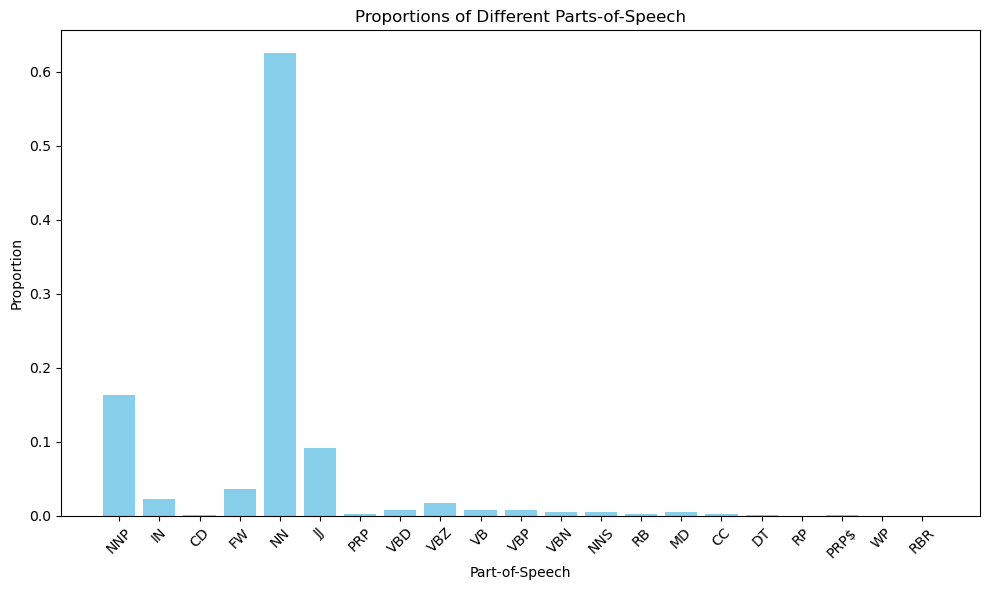

In [46]:
pos = list(pos_proportions.keys())
proportions = list(pos_proportions.values())

plt.figure(figsize=(10, 6))
plt.bar(pos, proportions, color='skyblue')
plt.xlabel('Part-of-Speech')
plt.ylabel('Proportion')
plt.title('Proportions of Different Parts-of-Speech')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


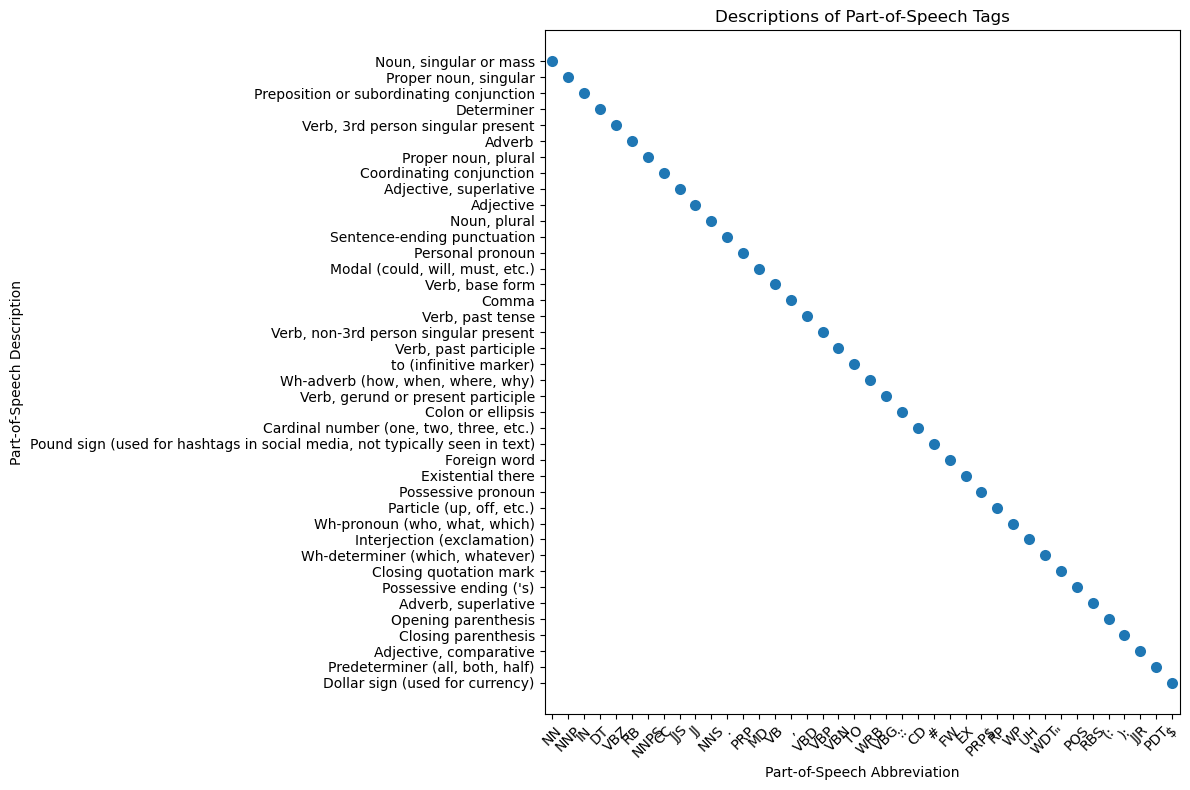

In [47]:
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Abbreviation', y='Description', data=df, size=8)
plt.xlabel('Part-of-Speech Abbreviation')
plt.ylabel('Part-of-Speech Description')
plt.title('Descriptions of Part-of-Speech Tags')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()